Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.5476 - val_loss: 0.3240
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3154 - val_loss: 0.2980
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2949 - val_loss: 0.2872
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2858 - val_loss: 0.2797
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2785 - val_loss: 0.2739
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


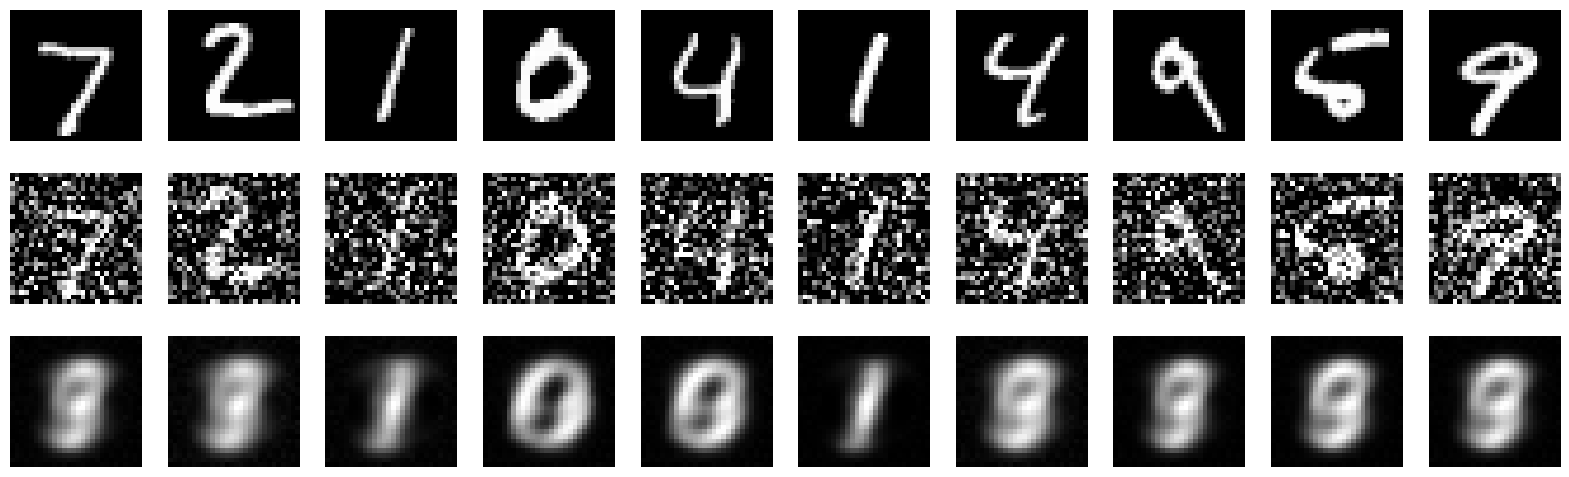

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist


# Load and preprocess the dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0

# Add noise
x_train_noisy = np.clip(x_train + 0.5 * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + 0.5 * np.random.normal(size=x_test.shape), 0., 1.)

# Define autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=256, validation_data=(x_test_noisy, x_test))

# Reconstruct images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and reconstructed images
plt.figure(figsize=(20, 6))
for i in range(10):
    # Original images
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Noisy images
    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed images
    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5618 - val_loss: 0.3283
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3232 - val_loss: 0.3096
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3068 - val_loss: 0.2987
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2968 - val_loss: 0.2923
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2911 - val_loss: 0.2877
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


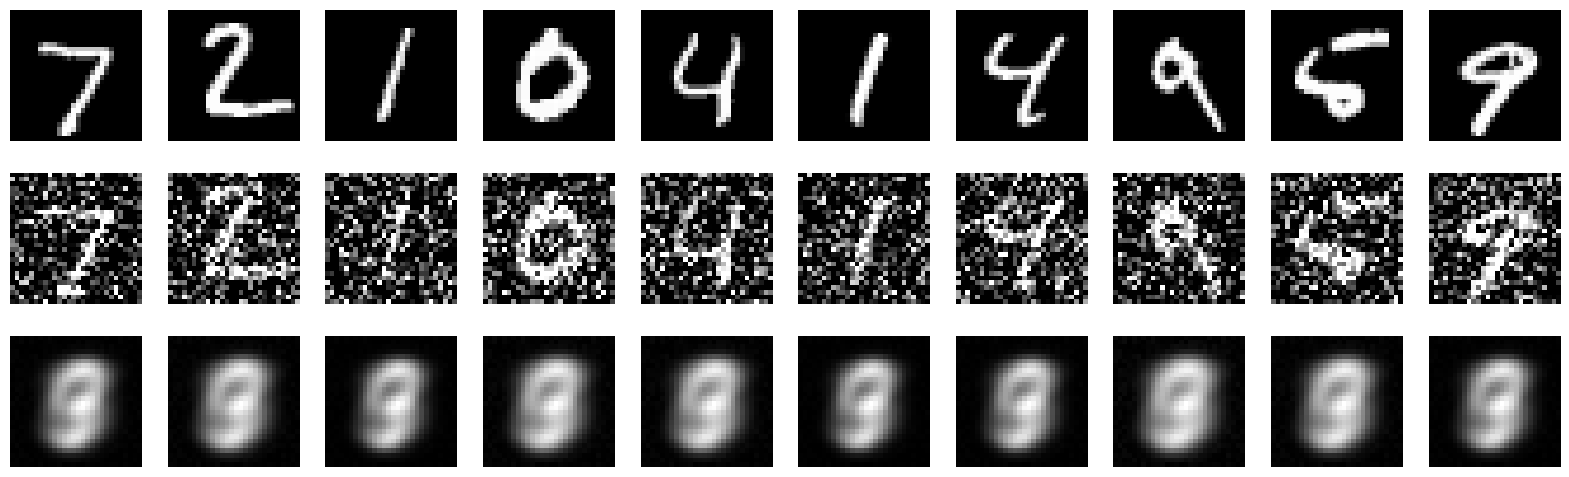

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers

# Load and preprocess dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0

# Add noise
noise_factor = 0.5
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(size=x_test.shape), 0., 1.)

# Define autoencoder model with sparsity constraint
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(1e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=256, validation_data=(x_test_noisy, x_test))

# Create encoder and decoder models
encoder = Model(input_img, encoded)
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and reconstructed images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    for j, img in enumerate([x_test, x_test_noisy, decoded_imgs]):
        ax = plt.subplot(3, n, i + j * n + 1)
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.show()
